In [19]:
import pandas as pd
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from yahoofinancials import YahooFinancials as yfs
import datetime as dt

In [20]:
start = dt.datetime(2020,1,1)
end = dt.datetime(2020,12,31)

yahoo finance

In [21]:
aapl = pdr.get_data_yahoo("AAPL", start, end, interval="w")

In [46]:
def financials(ticker):
    
    p_e = yfs(ticker).get_pe_ratio()
    div = yfs(ticker).get_dividend_yield()
    profit = yfs(ticker).get_gross_profit()

    print(f"P/E ratio ={p_e} and dividend yield is {div}. Gross profit {profit}")

interval = "m"-month, "w"-weekly. Daily by default

In [48]:
tickers= ['AAPL', 'COF']
data = pdr.get_data_yahoo(tickers, start, end)

In [49]:
data.head()

Attributes  Adj Close                 Close                   High  \
Symbols          AAPL        COF       AAPL         COF       AAPL   
Date                                                                 
2020-01-02  73.683563  99.030762  75.087502  103.610001  75.150002   
2020-01-03  72.967216  97.491913  74.357498  102.000000  75.144997   
2020-01-06  73.548630  96.612587  74.949997  101.080002  74.989998   
2020-01-07  73.202713  95.656776  74.597504  100.080002  75.224998   
2020-01-08  74.380280  96.669930  75.797501  101.139999  76.110001   

Attributes                    Low                   Open              \
Symbols            COF       AAPL         COF       AAPL         COF   
Date                                                                   
2020-01-02  103.620003  73.797501  102.300003  74.059998  103.410004   
2020-01-03  102.519997  74.125000  101.320000  74.287498  101.980003   
2020-01-06  101.129997  73.187500  100.059998  73.447502  100.879997   
2020-01-07  100.699997  74.370003   99.830002  74.959999  100.199997   
2020-01-08  101.550003  74.290001  100.269997  74.290001  100.510002   

Attributes       Volume             
Symbols            AAPL        COF  
Date                                
2020-01-02  135480400.0  1603000.0  
2020-01-03  146322800.0  1450100.0  
2020-01-06  118387200.0  1526300.0  
2020-01-07  108872000.0  1978200.0  
2020-01-08  132079200.0  2194600.0

In [51]:
data["Ratio"]=data["Adj Close"]['AAPL']/data["Adj Close"]['COF']

In [52]:
data.head()

Attributes  Adj Close                 Close                   High  \
Symbols          AAPL        COF       AAPL         COF       AAPL   
Date                                                                 
2020-01-02  73.683563  99.030762  75.087502  103.610001  75.150002   
2020-01-03  72.967216  97.491913  74.357498  102.000000  75.144997   
2020-01-06  73.548630  96.612587  74.949997  101.080002  74.989998   
2020-01-07  73.202713  95.656776  74.597504  100.080002  75.224998   
2020-01-08  74.380280  96.669930  75.797501  101.139999  76.110001   

Attributes                    Low                   Open              \
Symbols            COF       AAPL         COF       AAPL         COF   
Date                                                                   
2020-01-02  103.620003  73.797501  102.300003  74.059998  103.410004   
2020-01-03  102.519997  74.125000  101.320000  74.287498  101.980003   
2020-01-06  101.129997  73.187500  100.059998  73.447502  100.879997   
2020-01-07  100.699997  74.370003   99.830002  74.959999  100.199997   
2020-01-08  101.550003  74.290001  100.269997  74.290001  100.510002   

Attributes       Volume                Ratio  
Symbols            AAPL        COF            
Date                                          
2020-01-02  135480400.0  1603000.0  0.744047  
2020-01-03  146322800.0  1450100.0  0.748444  
2020-01-06  118387200.0  1526300.0  0.761274  
2020-01-07  108872000.0  1978200.0  0.765264  
2020-01-08  132079200.0  2194600.0  0.769425

<AxesSubplot: xlabel='Date'>

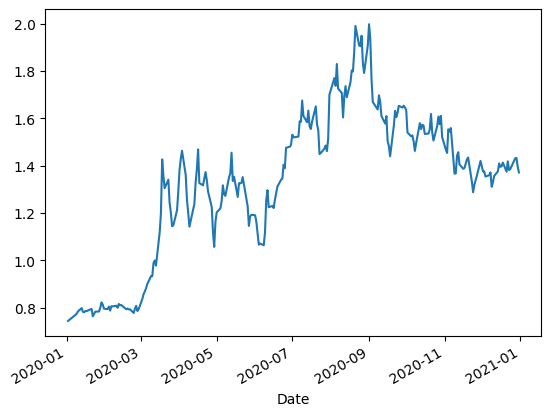

In [54]:
data['Ratio'].plot()

In [29]:
aapl = data.xs("AAPL", axis=1, level=1)
aapl.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,73.683571,75.087502,75.150002,73.797501,74.059998,135480400.0
2020-01-03,72.967209,74.357498,75.144997,74.125000,74.287498,146322800.0
2020-01-06,73.548630,74.949997,74.989998,73.187500,73.447502,118387200.0
2020-01-07,73.202728,74.597504,75.224998,74.370003,74.959999,108872000.0
2020-01-08,74.380280,75.797501,76.110001,74.290001,74.290001,132079200.0


In [30]:
AAPL_inc_stmnt = yfs('AAPL').get_financial_stmts('annual', 'income')
aapl_finance = AAPL_inc_stmnt['incomeStatementHistory']['AAPL']

In [31]:
df_list = []

for df in aapl_finance:
    df_list.append(pd.DataFrame.from_dict(df, orient='index'))

aapl_inc_st_df = pd.concat(df_list)
aapl_inc_st_df


,researchDevelopment,effectOfAccountingCharges,incomeBeforeTax,minorityInterest,netIncome,sellingGeneralAdministrative,grossProfit,ebit,operatingIncome,otherOperatingExpenses,...,nonRecurring,otherItems,incomeTaxExpense,totalRevenue,totalOperatingExpenses,costOfRevenue,totalOtherIncomeExpenseNet,discontinuedOperations,netIncomeFromContinuingOps,netIncomeApplicableToCommonShares
2021-09-25,21914000000,None,109207000000,None,94680000000,21973000000,152836000000,108949000000,108949000000,None,...,None,None,14527000000,365817000000,256868000000,212981000000,258000000,None,94680000000,94680000000
2020-09-26,18752000000,None,67091000000,None,57411000000,19916000000,104956000000,66288000000,66288000000,None,...,None,None,9680000000,274515000000,208227000000,169559000000,803000000,None,57411000000,57411000000
2019-09-28,16217000000,None,65737000000,None,55256000000,18245000000,98392000000,63930000000,63930000000,None,...,None,None,10481000000,260174000000,196244000000,161782000000,1807000000,None,55256000000,55256000000
2018-09-29,14236000000,None,72903000000,None,59531000000,16705000000,101839000000,70898000000,70898000000,None,...,None,None,13372000000,265595000000,194697000000,163756000000,2005000000,None,59531000000,59531000000


In [32]:
AAPL_balance_stmt = yfs('AAPL').get_financial_stmts('annual', 'balance')
AAPL_balance = AAPL_balance_stmt['balanceSheetHistory']['AAPL']
AAPL_balance

[{'2021-09-25': {'totalLiab': 287912000000,
   'totalStockholderEquity': 63090000000,
   'otherCurrentLiab': 53577000000,
   'totalAssets': 351002000000,
   'commonStock': 57365000000,
   'otherCurrentAssets': 14111000000,
   'retainedEarnings': 5562000000,
   'otherLiab': 43050000000,
   'treasuryStock': 163000000,
   'otherAssets': 38762000000,
   'cash': 34940000000,
   'totalCurrentLiabilities': 125481000000,
   'shortLongTermDebt': 9613000000,
   'otherStockholderEquity': 163000000,
   'propertyPlantEquipment': 49527000000,
   'totalCurrentAssets': 134836000000,
   'longTermInvestments': 127877000000,
   'netTangibleAssets': 63090000000,
   'shortTermInvestments': 27699000000,
   'netReceivables': 51506000000,
   'longTermDebt': 109106000000,
   'inventory': 6580000000,
   'accountsPayable': 54763000000}},
 {'2020-09-26': {'totalLiab': 258549000000,
   'totalStockholderEquity': 65339000000,
   'otherCurrentLiab': 47867000000,
   'totalAssets': 323888000000,
   'commonStock': 50779

In [33]:
df_list = []

for df in AAPL_balance:
    df_list.append(pd.DataFrame.from_dict(df, orient='index'))

aapl_bce_sheet = pd.concat(df_list)
aapl_bce_sheet


,totalLiab,totalStockholderEquity,otherCurrentLiab,totalAssets,commonStock,otherCurrentAssets,retainedEarnings,otherLiab,treasuryStock,otherAssets,...,otherStockholderEquity,propertyPlantEquipment,totalCurrentAssets,longTermInvestments,netTangibleAssets,shortTermInvestments,netReceivables,longTermDebt,inventory,accountsPayable
2021-09-25,287912000000,63090000000,53577000000,351002000000,57365000000,14111000000,5562000000,43050000000,163000000,38762000000,...,163000000,49527000000,134836000000,127877000000,63090000000,27699000000,51506000000,109106000000,6580000000,54763000000
2020-09-26,258549000000,65339000000,47867000000,323888000000,50779000000,11264000000,14966000000,46108000000,-406000000,33952000000,...,-406000000,45336000000,143713000000,100887000000,65339000000,52927000000,37445000000,98667000000,4061000000,42296000000
2019-09-28,248028000000,90488000000,43242000000,338516000000,45174000000,12352000000,45898000000,50503000000,-584000000,32978000000,...,-584000000,37378000000,162819000000,105341000000,90488000000,51713000000,45804000000,91807000000,4106000000,46236000000
2018-09-29,258578000000,107147000000,39293000000,365725000000,40201000000,12087000000,70400000000,48914000000,-3454000000,22283000000,...,-3454000000,41304000000,131339000000,170799000000,107147000000,40388000000,48995000000,93735000000,3956000000,55888000000


In [34]:
AAPL_cash_stmt = yfs('AAPL').get_financial_stmts('annual', 'cash')
AAPL_cash_flow = AAPL_cash_stmt['cashflowStatementHistory']['AAPL']
AAPL_cash_flow


[{'2021-09-25': {'investments': -2819000000,
   'changeToLiabilities': 14002000000,
   'totalCashflowsFromInvestingActivities': -14545000000,
   'netBorrowings': 12665000000,
   'totalCashFromFinancingActivities': -93353000000,
   'changeToOperatingActivities': -6146000000,
   'issuanceOfStock': 1105000000,
   'netIncome': 94680000000,
   'changeInCash': -3860000000,
   'repurchaseOfStock': -92527000000,
   'totalCashFromOperatingActivities': 104038000000,
   'depreciation': 11284000000,
   'otherCashflowsFromInvestingActivities': -608000000,
   'dividendsPaid': -14467000000,
   'changeToInventory': -2642000000,
   'changeToAccountReceivables': -10125000000,
   'otherCashflowsFromFinancingActivities': -129000000,
   'changeToNetincome': 2985000000,
   'capitalExpenditures': -11085000000}},
 {'2020-09-26': {'investments': 5335000000,
   'changeToLiabilities': -1981000000,
   'totalCashflowsFromInvestingActivities': -4289000000,
   'netBorrowings': 2499000000,
   'totalCashFromFinancingA

In [35]:
df_list = []

for df in AAPL_cash_flow:
    df_list.append(pd.DataFrame.from_dict(df, orient='index'))

aapl_cash = pd.concat(df_list)
aapl_cash


,investments,changeToLiabilities,totalCashflowsFromInvestingActivities,netBorrowings,totalCashFromFinancingActivities,changeToOperatingActivities,issuanceOfStock,netIncome,changeInCash,repurchaseOfStock,totalCashFromOperatingActivities,depreciation,otherCashflowsFromInvestingActivities,dividendsPaid,changeToInventory,changeToAccountReceivables,otherCashflowsFromFinancingActivities,changeToNetincome,capitalExpenditures
2021-09-25,-2819000000,14002000000,-14545000000,12665000000,-93353000000,-6146000000,1105000000,94680000000,-3860000000,-92527000000,104038000000,11284000000,-608000000,-14467000000,-2642000000,-10125000000,-129000000,2985000000,-11085000000
2020-09-26,5335000000,-1981000000,-4289000000,2499000000,-86820000000,881000000,880000000,57411000000,-10435000000,-75992000000,80674000000,11056000000,-791000000,-14081000000,-127000000,6917000000,-126000000,6517000000,-7309000000
2019-09-28,58093000000,-2548000000,45896000000,-7819000000,-90976000000,-896000000,781000000,55256000000,24311000000,-69714000000,69391000000,12547000000,-1078000000,-14119000000,-289000000,245000000,-105000000,5076000000,-10495000000
2018-09-29,30845000000,9172000000,16066000000,432000000,-87876000000,30016000000,669000000,59531000000,5624000000,-75265000000,77434000000,10903000000,-745000000,-13712000000,828000000,-5322000000,-105000000,-27694000000,-13313000000


In [36]:
pdr.get_data_stooq("AAPL", start, end)

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-31,132.7060,133.3550,130.3690,131.3380,1.001403e+08
2020-12-30,134.1540,134.6030,132.0370,132.3560,9.744832e+07
2020-12-29,136.6400,137.3690,132.9650,133.4850,1.222975e+08
2020-12-28,132.6160,135.9510,132.1460,135.3020,1.257720e+08
2020-12-24,129.9690,132.0970,129.7500,130.6190,5.549740e+07
...,...,...,...,...,...
2020-01-08,72.9017,74.6863,72.8997,74.3807,1.348858e+08
2020-01-07,73.5568,73.8195,72.9816,73.2043,1.136353e+08
2020-01-06,72.0709,73.5868,71.8212,73.5468,1.208379e+08


Nasdaq

In [37]:
nasdaq_simbols = pdr.get_nasdaq_symbols()

In [38]:
len(nasdaq_simbols)

12159